# Project 3

#### Faraz Karim
#### UID: 117088397

## Part 1

### Importing Data

In [202]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/jennybc/gapminder/main/data-raw/08_gap-every-five-years.tsv'
res = requests.get(url, allow_redirects=True)
with open('08_gap-every-five-years.tsv','wb') as file:
    file.write(res.content)

data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1

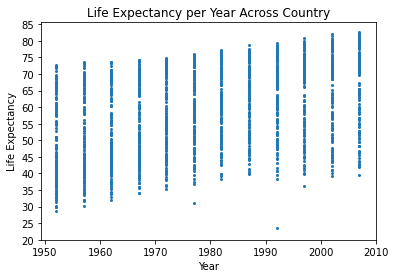

In [203]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(data.year, data.lifeExp, s = 4)
plt.title("Life Expectancy per Year Across Country")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.xticks(np.arange(1950, 2011, 10))
plt.yticks(np.arange(20, 86, 5))

plt.show()

I imported the data from a get request, using the url for the raw .tsv file on github. I then used the matplotlib.pyplot function scatter in order to create a scatter plot create the scatter plot. I cleaned up the plot and adjusted the axes to make the plot look nice and better-readable.

### Question 1

There is an increasing trend for life expectancy across time that appears to be linear. The average life expectancy seems to grow from ~50 years old in 1952 to ~60 years old in 2007. Although not perfectly linear, the life expectancy generally increases by a steady amount per 5 years.

### Violin Plot

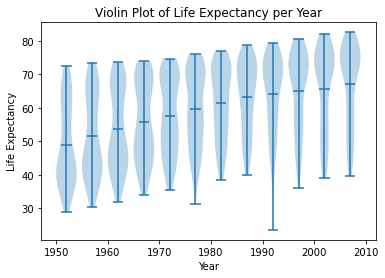

In [80]:
fig, ax = plt.subplots()

life_exp_per_year = []

for c, col in data.groupby("year"):
    life_exp_per_year.append(col['lifeExp'])

years = []
years = data['year'].unique()

ax.violinplot(life_exp_per_year,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot of Life Expectancy per Year")
fig.savefig("violin.png")

### Question 2

The distribution is skewed, and trends from bottom-heavy to top-heavy. Years like 1977 and 1992 stand out as especially skewed because of their long tails. In terms of modality, the data seems to be unimodal from 1952 to 1957 and 1982 to 2007. The earlier years have the mode in the bottom half, whereas it is in the top half for later years. The middle years (1962-1977) pretty clearly have a violin shape that shows the data is bimodal. It is not symmetric around the center because it is not a cnormal distribution.

### Question 3
It is fairly visually evident from this data that there seems to be a strong, positive relationship between life expectancy and year across many countries, so I would reject the null hypothesis. 

### Question 4
The violin plot of residuals vs year should be still have a linear relationship and have the same numer of modes as the violin plot of life expectancy.

### Question 5
The violin plot should be a normal distribution which is symmetric and centers around 0.

### Exercise 2

In [118]:
import statsmodels.formula.api as sm

result = sm.ols(formula="lifeExp ~ year", data=data[['year', 'lifeExp']].sort_values(by=['year'], ascending=True).reset_index(drop=True)).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        22:04:01   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

### Question 6
Life expectancy increases by 0.3259 yearly around the world according to this model.

### Question 7
I do reject the null hypothesis of no relationship because the p-value is < 0.05 (7.55e-80), meaning the null hypothesis is not compatible with the data.

### Exercise 3

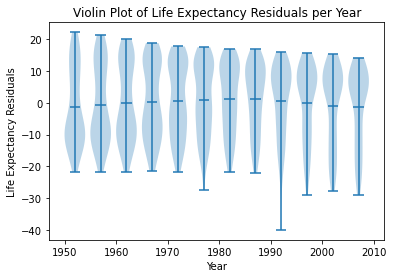

In [84]:
m = result.params.year
b = result.params.Intercept

data['expected'] = 0.0
for i, row in data.iterrows():
    y = (row['year']) * m + b
    data.at[i, 'expected'] =  y

residuals = []
for c, col in data.groupby("year"):
    residuals.append(col['lifeExp'] - col['expected'])

fig, ax = plt.subplots()

ax.violinplot(residuals,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy Residuals")
ax.set_title("Violin Plot of Life Expectancy Residuals per Year")
fig.savefig("violin.png")

Using the regression model, I determined the expected value for each year. Then I created a list of residuals per year of every country by subtracting the life expectancy and expected value. Then I reused the code from the previous violin plot, this time using the residuals instead of the life expectancy.

### Question 8
Yes because, as I expected, the violin plot of residuals is linear with similar modality to the life expectancy. It is also a normal distribution which is symmetric around 0, which I did not predict.

### Exercise 4

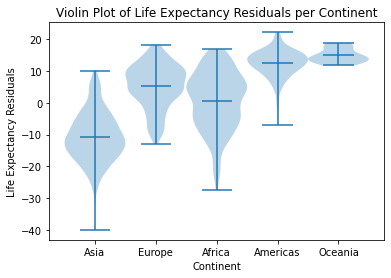

In [97]:
residuals2 = []
for c, col in data.groupby("continent"):
    residuals2.append(col['lifeExp'] - col['expected'])

fig, ax = plt.subplots()

continents = []
continents = data['continent'].unique()
conts_x = range(0, len(continents))

ax.violinplot(residuals2,conts_x,widths=1,showmeans=True)
ax.set_xlabel("Continent")
ax.set_xticks(ticks = conts_x, labels = continents)
ax.set_ylabel("Life Expectancy Residuals")
ax.set_title("Violin Plot of Life Expectancy Residuals per Continent")
fig.savefig("violin.png")

I used the same code as the third exercise, but instead of grouping by year when creating the list of residuals, I grouped by continent.

### Question 9
There is a dependence between model residual and continent because the means and distributions are different for each continent. When doing a regression analysis of life expectancy across time, I would suggest taking the continent into consideration.

### Exercise 5

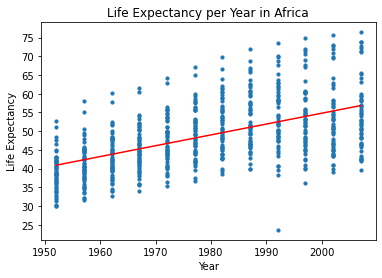

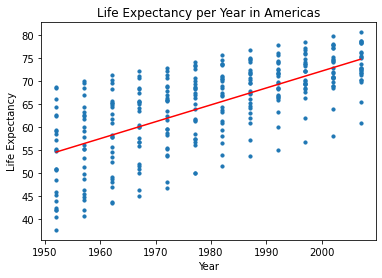

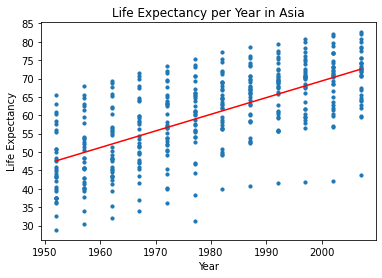

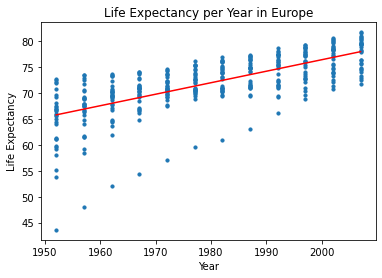

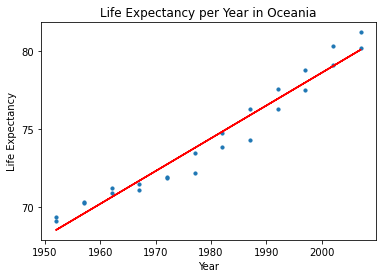

In [204]:
for c, col in data.groupby("continent"):
    plt.scatter(col.year, col.lifeExp, s = 10)
    plt.title("Life Expectancy per Year in " + c)
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.xticks(np.arange(1950, 2011, 10))
    plt.yticks(np.arange(20, 86, 5))
    
    fit = np.polyfit(col.year, col.lifeExp, deg=1)
    plt.plot(col.year, fit[0] * col.year + fit[1], color='red')
    
    plt.show()

I used the same scatter plot code from the first exercise, but modified it such that it would only use the data for each respective continent. Then I used numpy polyfit to find the equation of the regression line and plotted it.

### Question 10
Yes, the regression model should include an interaction term for continent and year because both are influential to life expectancy. The data and slope of the regression line varies greatly in each continent, showing the significance continent has on life expectancy.

### Exercise 6

In [120]:
regression = sm.ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:04:50   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11
Every parameter in the model is significantly different from 0 because they have p-values < 0.05. The only parameter which is not significantly different is Oceania because it's p-value, 0.36, is significantly > 0.05.

### Question 12

In [121]:
regression.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64

Since Africa is omitted, we see that Africa's life expectancy increases by 0.289529 per year. From there, we can calculate the increases based on Africa's increase.

Africa: 0.289529/year <br>
Americas: 0.289529 + 0.078122 = 0.367651/year <br>
Asia: 0.289529 + 0.163593 = 0.453122/year <br>
Europe: 0.289529 - 0.067597 = 0.221932/year <br>
Oceania: 0.289529 - 0.079257 = 0.210272/year <br>

### Exercise 7

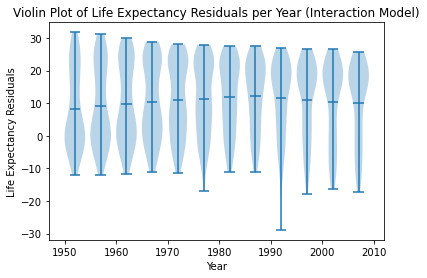

In [205]:
m = regression.params.year
b = regression.params.Intercept

data['expected'] = 0.0
for i, row in data.iterrows():
    y = (row['year']) * m + b
    data.at[i, 'expected'] =  y

residuals = []
for c, col in data.groupby("year"):
    residuals.append(col['lifeExp'] - col['expected'])

fig, ax = plt.subplots()

ax.violinplot(residuals,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy Residuals")
ax.set_title("Violin Plot of Life Expectancy Residuals per Year (Interaction Model)")
fig.savefig("violin.png")

This plot does not match the assumptions of a linear regression model well. It is not symmetric or centered around 0.

## Part 2

In [167]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = datasets.load_breast_cancer()

### Decision Trees

In [200]:
ind = pd.DataFrame(data.data, columns=data.feature_names)

dep = pd.Categorical.from_codes(data.target, data.target_names)

ind_train, ind_test, dep_train, dep_test = ms.train_test_split(ind, dep, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(ind_train, dep_train)

predicted = dt.predict(ind_test)
predicted

actual = np.array(dep_test)
predictions = np.array(predicted)
m = met.confusion_matrix(actual, predictions)

accuracy = (m[0][0] + m[1][1]) / (m[0][0] + m[1][1] + m[0][1] + m[1][0])
    
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.951048951048951


### k-NN Classification

In [199]:
total_acc = 0

X_train, X_test, y_train, y_test = ms.train_test_split(data.data, data.target, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("k-NN Accuracy", met.accuracy_score(y_test, y_pred))

k-NN Accuracy 0.935672514619883


I used the SKLearn breast cancer data to classify cancer scans as benign or malignant. For the decision tree classification I used cross-validation, and for the k-NN classification I used holdout classification with a 70/30 ratio. I am measuring performance based on accuracy. Based on this metric, both the decision tree and k-NN classification perform exceptionally well with accuracy above 90%. However, the decision tree classification just barely edges out k-NN classification, outperforming it by around 1.5%. I used SKLearn's test_train_split as my model selection procedure, which splits the data into subsets that minimize bias.